## Задание 1

Реализовать вычисление энтропии и посчитать её значение для:

(0.2, 0.2, 0.2, 0.2, 0.2)
(0.5, 0.5)
(0.9, 0.05, 0.05, 0)
(0, 0, 0, 0, 1, 0)

Объяснить полученные результаты

In [22]:
import numpy as np

In [23]:
np.seterr(divide = 'ignore')
np.seterr(invalid = 'ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [24]:
arr1 = np.array((0.2, 0.2, 0.2, 0.2, 0.2))
arr2 = np.array((0.5, 0.5))
arr3 = np.array((0.9, 0.05, 0.05, 0))
arr4 = np.array((0, 0, 0, 0, 1, 0))

In [25]:
def Entropy(arr):
    return -np.nansum(arr * np.log2(arr))

In [26]:
print(Entropy(arr1))
print(Entropy(arr2))
print(Entropy(arr3))
print(Entropy(arr4))

2.321928094887362
1.0
0.5689955935892812
-0.0


Разбиение 1: Максимальная энтропия - вероятности равны, распределение равномерное (поровну объектов каждого класса) <br> Разбиение 2: Классов меньше - энтропия ниже, но вероятности также равны (поровну объектов каждого класса) <br> Разбиение 3: Вероятность для первого класса больше, чем для других, поэтому энтропия ниже <br> Разбиение 4: Нулевая энтропия - в вершине только один класс

## Задание 3
Выполните задание 2 с помощью sklearn: <br>
Постройте решающее дерево с глубиной 1, 2 и 3.<br>
Также постройте дерево максимальной глубины<br>
Визуализируйте получившиеся результаты классификатора на плоскости<br>

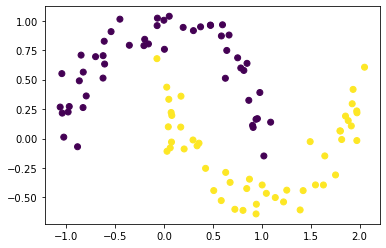

In [1]:
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt
import numpy as np


x, y = make_moons(n_samples=100, noise=0.1)
plt.scatter(x[:,0], x[:,1], c = y);

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
def show_classes(clf, x, y, h=.03, cmap=plt.cm.coolwarm):
    x_min, x_max = np.min(x[:,0]) - 1, np.max(x[:,0]) + 1
    y_min, y_max = np.min(x[:,1]) - 1, np.max(x[:,1]) + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))

    Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,7))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=.5)
    plt.scatter(x[:,0], x[:,1], s=200, c = y, cmap=cmap)
    plt.title(f"k = {clf.max_depth}")
    plt.show()

In [5]:
depths = [1, 2, 3, 4,5]
for depth in depths:
    decisionTreeClassifier = DecisionTreeClassifier(max_depth=depth)
    decisionTreeClassifier.fit(X_train, y_train)
    show_classes(decisionTreeClassifier, x, y, h=.05)
    y_pred = decisionTreeClassifier.predict(X_test)
    print(f"Predicted labels с глубиной {depth} = {y_pred}")
    print(f"Accuracy с глубиной {depth} = {accuracy(y_pred, y_test)}")

NameError: name 'X_train' is not defined